In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.8.0'

# 신경망 모델 훈련

**[핵심키워드]** 손실곡선, 드롭아웃(dropout), 콜백(callback), 조기종료  

- 인공신경망 모델을 훈련하는 모범 사례와 필요한 도구 학습
- 모델링 순서는 머신러닝이랑 비슷함

### 데이터 준비

In [4]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

In [5]:
# fashion mnist datasets loading
(train_input, train_target), (test_input, test_target) = fashion_mnist.load_data()
train_scaled = train_input/255.0
train_X, val_X, train_y, val_y = train_test_split(train_scaled, train_target,
                                                 test_size = 0.2, random_state=42)

### 모델 생성 함수 정의

: 함수의 a_layer 매개변수는 케라스 층으로서, 은닉층 뒤에 층을 추가하는 함수

In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [7]:
def model_fn(a_layer=None):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    model.add(layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(layers.Dense(10, activation='softmax'))
    return model

### 모델 생성하고 모델의 정보 출력

In [8]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


### 모델 컴파일 및 훈련
: 훈련된 모델 객체를 변수 history에 저장  

In [9]:
# 기본 RMSprop 옵티마이저로 모델 학습
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_scaled, train_target, epochs=5, verbose=0)

# categorical_crossentropy랑 sparse_categorical_crossentropy와의 차이는 sparse는 integer type 클래스라는 점
# 다중 분류 손실함수, 그리고 원핫 인코딩은 따로 필요 없음.

- history 객체는 딕셔너리 형식으로 훈련 측정값이 저장되어 있음
    - loss와 accuracy : 에포크마다 계산한 값이 순서대로 리스트에 저장

In [10]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

## 손실 곡선

### history 속성에 포함된 손실(loss)과 정확도(accuracy) 시각화

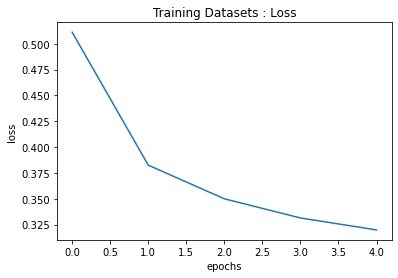

In [11]:
plt.plot(hist.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training Datasets : Loss')
plt.savefig('./img/DL1', dpi=300)
plt.show()

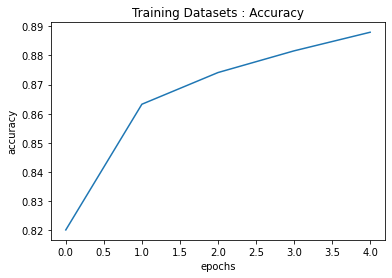

In [12]:
plt.plot(hist.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training Datasets : Accuracy')
plt.savefig('./img/DL2', dpi=300)
plt.show()

### epochs=20 인 경우 모델 훈련 후 loss 값 시각화

In [15]:
# 에포크가 너무 작아도 과소적합, 너무 커도 과대적합이 일어남

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist2 = model.fit(train_scaled, train_target, epochs=20, verbose=0)

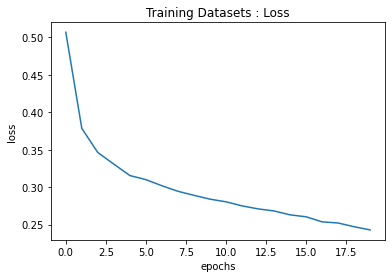

In [16]:
plt.plot(hist2.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training Datasets : Loss')
plt.savefig('./img/DL2', dpi=300)
plt.show()

#### [문제1] epochs=20으로 학습한 경우 accuracy 값을 그래프로 그려보시오

## 검증 손실

- 에포크에 따라 과대적합과 과소적합이 달라짐
- 인공신경망 모델이 최적화하는 대상을 정확도가 아니라 손실함수
    - 손실감소에 비례하여 정확도가 높아지지 않는 경우도 있음
    - 모델이 잘 훈련되었는지 판단하기 위해서는 정확도보다는 손실함수의 값을 확인

#### 에포크마다 검증 손실 계산
- fit() 메서드의 **validation_data** 매개변수에 검증 데이터를 전달
- 검증할 입력과 타깃값은 튜플로 전달

In [17]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist3 = model.fit(train_X, train_y, epochs=20, validation_data=(val_X, val_y))

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5275 - accuracy: 0.8129 - val_loss: 0.4026 - val_accuracy: 0.8583
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3917 - accuracy: 0.8605 - val_loss: 0.3715 - val_accuracy: 0.8681
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3525 - accuracy: 0.8731 - val_loss: 0.3809 - val_accuracy: 0.8679
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3321 - accuracy: 0.8799 - val_loss: 0.3615 - val_accuracy: 0.8782
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3177 - accuracy: 0.8864 - val_loss: 0.3537 - val_accuracy: 0.8811
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3076 - accuracy: 0.8901 - val_loss: 0.3842 - val_accuracy: 0.8714
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2961 - accuracy: 0.8939 - val_loss: 0.3852 - val_accuracy:

#### 검증데이터에 대한 손실과 정확도는 val_loss, val_accuracy에 저장

In [18]:
hist3.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### 훈련데이터와 검증데이터에 대한 손실과 정확도 시각화

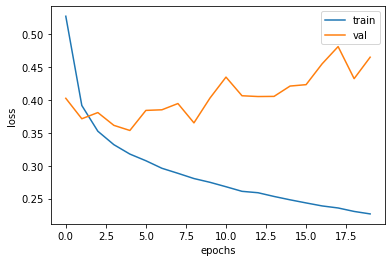

In [19]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- 위 그래프를 보면 epoch=5인 경우 검증 손실이 감소하다가 다시 증가함
- 훈련 손실은 꾸준히 감소하므로 전형적인 과대적합 모델
- 검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들고 정확도는 증가함

#### Adam 옵티마이저를 이용한 모델의 훈련 손실과 검증 손실

In [21]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist4 = model.fit(train_X, train_y, epochs=20, validation_data=(val_X, val_y))

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5184 - accuracy: 0.8189 - val_loss: 0.4424 - val_accuracy: 0.8389
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3891 - accuracy: 0.8601 - val_loss: 0.3720 - val_accuracy: 0.8683
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3522 - accuracy: 0.8712 - val_loss: 0.3455 - val_accuracy: 0.8754
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3292 - accuracy: 0.8796 - val_loss: 0.4054 - val_accuracy: 0.8499
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3078 - accuracy: 0.8861 - val_loss: 0.3704 - val_accuracy: 0.8671
Epoch 6/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2898 - accuracy: 0.8925 - val_loss: 0.3404 - val_accuracy: 0.8800
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2796 - accuracy: 0.8972 - val_loss: 0.3376 - val_accuracy:

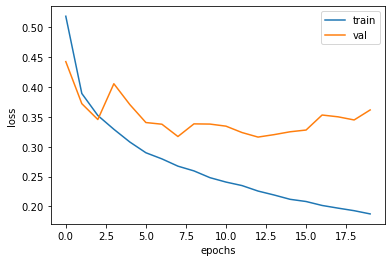

In [22]:
plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- 위 그래프를 보면 Adam 옵티마이저가 RMSprop 옵티마이저보다 과대적합이 많이 줄어듦
- 검증 손실은 10번째 에포크까지 감소 추세가 이어짐
- Adam 옵티마이저가 이 데이터셋이 더 적합함을 보여줌
- 더 나은 손실 곡선을 얻으려면 학습률을 조정해서 시도 가능

#### [문제2] 앞의 신경망 모델에 대하여 학습률을 조정하여 변화되는 손실 곡선을 그려보시오.

---

## 드롭아웃(dropout)

: 딥러닝의 아버지로 불리는 제프리 힌턴(Geoffrey  Hinton)이 소개한 개념
- 은닉층에서 있는 뉴런의 출력을 랜덤하게 꺼서 과대적합을 막는 기법
- 훈련 중에 적용되며 평가나 예측에서는 적용되지 않음
- 텐서플로는 이를 자동으로 처리

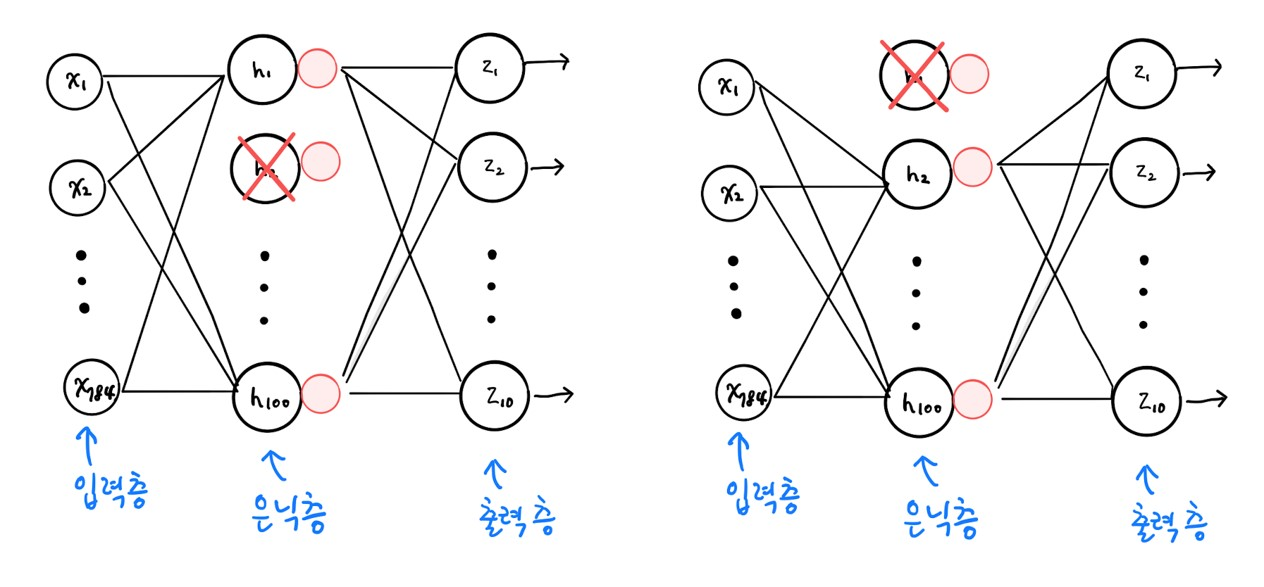

#### 드롭아웃이 과대적합을 막는 이유?

- 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고, 모든 입력에 대해 주의를 기울여야 함 

#### Dropout 클래스

- keras.layres 패키지 아래 제공
    - keras.layers.Dropout(드롭아웃비율)  
    - 드롭아웃하지 않는 뉴런의 출력은 $1/(1-r)$ 만큼 증가시켜 출력의 총합이 같도록 만듬

- 어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만듬

In [29]:
# 30% 정도 드롭아웃

# drop = layes.Dropout(0, 3)
# model = model_fn(drop)

model = model_fn(layers.Dropout(0.3))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


#### 드롭아웃이 적용된 모델의 훈련 손실과 검증 손실 그래프

In [30]:
# model = model_fn()은 빼기. 위에서 drop해서 변수 초기화됨

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
hist5 = model.fit(train_X, train_y, epochs=20, validation_data=(val_X, val_y))

Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5938 - accuracy: 0.7905 - val_loss: 0.4221 - val_accuracy: 0.8463
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4419 - accuracy: 0.8424 - val_loss: 0.4082 - val_accuracy: 0.8493
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4032 - accuracy: 0.8546 - val_loss: 0.3830 - val_accuracy: 0.8578
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3807 - accuracy: 0.8605 - val_loss: 0.3596 - val_accuracy: 0.8698
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3676 - accuracy: 0.8659 - val_loss: 0.3505 - val_accuracy: 0.8739
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3577 - accuracy: 0.8694 - val_loss: 0.3377 - val_accuracy: 0.8763
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3468 - accuracy: 0.8718 - val_loss: 0.3430 - val_accuracy:

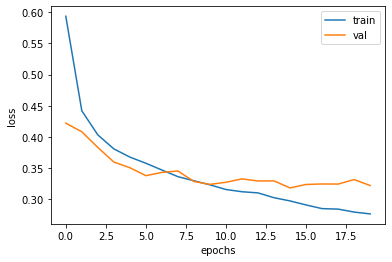

In [31]:
plt.plot(hist5.history['loss'])
plt.plot(hist5.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 모델 저장과 복원

#### 에포크 횟수를 10으로 지정하고 모델을 훈련

In [32]:
best_model = model_fn(layers.Dropout(0.3))
best_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
                 metrics=['accuracy'])

hist_best = model.fit(train_X, train_y, epochs=10, validation_data=(val_X, val_y))

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2747 - accuracy: 0.8974 - val_loss: 0.3314 - val_accuracy: 0.8853
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2677 - accuracy: 0.8986 - val_loss: 0.3360 - val_accuracy: 0.8840
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2687 - accuracy: 0.8988 - val_loss: 0.3260 - val_accuracy: 0.8852
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2664 - accuracy: 0.8992 - val_loss: 0.3269 - val_accuracy: 0.8876
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2592 - accuracy: 0.9006 - val_loss: 0.3309 - val_accuracy: 0.8885
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2596 - accuracy: 0.9012 - val_loss: 0.3252 - val_accuracy: 0.8850
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2579 - accuracy: 0.9032 - val_loss: 0.3269 - val_accuracy:

#### 훈련된 모델의 파라미터를 저장 : save_weights() 메서드  
- 텐서플로의 체크포인트 포맷 또는 HDF5 포맷인 .h5 파일로 저장  

In [33]:
model.save_weights('./model/model-weights.h5')

#### 훈련된 모델 구조와 파라미터를 함께 저장 : model.save() 메서드   

- 텐서플로의 SavedModel 포맷 또는 HDF5 포맷인 .h5 파일로 저장  

In [34]:
model.save('./model/model-whole.h5')

#### 저장된 파일들 확인

In [35]:
%od model
%ls *.h5
%cd ..

UsageError: Line magic function `%od` not found.


In [36]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 8867-9E81

 C:\TIL\DL 디렉터리

2022-04-10  오후 05:42    <DIR>          .
2022-04-09  오전 07:55    <DIR>          ..
2022-04-10  오후 04:27    <DIR>          .ipynb_checkpoints
2022-03-24  오전 11:13    <DIR>          datasets
2022-03-22  오전 11:47    <DIR>          img
2022-04-10  오후 05:41    <DIR>          model
2022-04-10  오후 04:55            11,942 model.png
2022-03-24  오전 11:36    <DIR>          train
2022-04-10  오후 04:04         3,662,098 딥러닝01_딥러닝과 퍼셉트론.ipynb
2022-04-10  오후 04:18           927,418 딥러닝02_데이터표현과 텐서연산.ipynb
2022-04-10  오후 04:32           942,904 딥러닝02_데이터표현과 텐서연산2.ipynb
2022-04-10  오후 05:20           472,560 딥러닝03_첫번째신경망.ipynb
2022-04-10  오후 05:42           552,693 딥러닝04_신경망모델훈련.ipynb
2022-03-23  오전 11:43           163,843 딥러닝05_신경망분류문제1_IMDB리뷰분류.ipynb
2022-03-23  오전 11:51            30,632 딥러닝05_신경망분류문제2_뉴스기사분류.ipynb
2022-03-24  오전 09:49            35,368 딥러닝06_신경망회귀문제_주택가격예측.ipynb
2022-03-24  오전 10:24         5,809,621 딥러닝07_CNN_소개.ipynb
2

#### 새로운 모델에 저장된 훈련모델 가중치를 적용하여 훈련

- load_weights(모델파라미터저장파일명) 메서드

- save_weights()로 저장된 모델과 정확히 같은 구조를 가져야 함

In [37]:
# model = model_fn(layers.Dropout(0, 3)) # 학습이 끝났는데 왜 있지? 
model.load_weights('./model/model-weights.h5')

#### 모델의 검증 정확도 확인

In [38]:
predicts = model.predict(val_X)
predicts.shape

(12000, 10)

In [44]:
val_pred = np.argmax(predicts, axis=1) # 최댓값의 인덱스를 가져옴
val_pred

# ***

array([8, 8, 7, ..., 8, 8, 0], dtype=int64)

In [45]:
val_y

array([8, 8, 7, ..., 8, 8, 1], dtype=uint8)

In [46]:
np.round(np.mean(val_pred == val_y), 4)

0.888

#### 모델 전체 파일을 읽은 후 검증 세트의 정확도 출력

- 모델 저장 파일 읽기 : load_model(파일명)
    - load_modle() 함수는 모델 파라미터와 모델 구조, 옵티마이저 상태까지 모두 복원
    - evaluate() 메서드 사용 가능

In [47]:
model = models.load_model('./model/model-whole.h5')
model.evaluate(test_input, test_target)

# 텐서플로 2, 3에서는 버그 때문에 compile()메서드를 호출해야 함

313/313 [==============================] - 1s 2ms/step - loss: 67.6175 - accuracy: 0.8621


[67.6174545288086, 0.8621000051498413]

## 콜백(callback)

- 훈련 과정 중간에 어떤 작업을 수행할 수 있도록 도와주는 객체
- 최상의 모델을 자동으로 저장해주거나 검증 점수가 더 이상 향상되지 않으면 종료
- keras.callbacks 패키지에 있는 클래스들
- 생성한 콜백객체들은 fit() 메서드의 callbacks 매개변수에 리스트로 감싸서 전달

### ModelCheckpoint 콜백
- 최상의 검증 점수를 만드는 모델 저장 


- keras.callbacks.ModelCheckpoint 클래스
    - 생성자의 인수로 저장할 파일이름 지정
    
    
- 형식 : keras.callbacks.ModelCheckpoint('파일이름', monitor='val_loss', save_weight_only=True)
    - monitor='val_loss' : 검증 손실을 관찰
    - save_weight_only : 
         - True인 경우 모델의 가중치와 절편만 저장
         - False인 경우 전체 모델을 저장

In [51]:
from tensorflow.keras import callbacks

model = model_fn(layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

check_cb = callbacks.ModelCheckpoint('./model/best_model.h5')
# check_cb = keras.callbacks.ModelCheckpoint('./model/best_model.h5')

model.fit(train_X, train_y, epochs=20, validation_data=(val_X, val_y), callbacks=[check_cb])

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5951 - accuracy: 0.7908 - val_loss: 0.4433 - val_accuracy: 0.8374
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4413 - accuracy: 0.8414 - val_loss: 0.3924 - val_accuracy: 0.8534
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4112 - accuracy: 0.8510 - val_loss: 0.3660 - val_accuracy: 0.8646
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3828 - accuracy: 0.8617 - val_loss: 0.3527 - val_accuracy: 0.8726
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3680 - accuracy: 0.8652 - val_loss: 0.3521 - val_accuracy: 0.8735
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3607 - accuracy: 0.8685 - val_loss: 0.3552 - val_accuracy: 0.8698
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3469 - accuracy: 0.8724 - val_loss: 0.3440 - val_accuracy:

####  저장된 최상의 검증 점수를 낸 모델을 다시 읽어 예측하기

In [52]:
model = models.load_model('./model/best_model.h5')
model.evaluate(test_input, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 60.4518 - accuracy: 0.8545


[60.45176315307617, 0.8544999957084656]

### 조기 종료 콜백 : EearlyStopping

- 과대적합이 되기 전에 훈련을 미지 중지하는 것
    - 검증점수가 더 이상 감소하지 않고 상승하여 과대적합이 일어나면 훈련을 계속 진행하지 않고 멈추는 기법
- 계산 비용과 시간 절약
- 훈련 에포크 횟수를 제한하는 역할로 과대적합을 예방 -> 규제 방법 중 하나


- 형식 : keras.callbacks.EarlyStopping(monitor='val_loss', patient, restore_best_weights=False)
    - patience : 검증 점수가 향상되지 않더라도 지속할 수 있는 최대 에포크 횟수
    - restore_best_weights : 최상의 모델 가중치를 복원할지 지정
        - True 인 경우 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림
        - 기본값은 False

#### EarlyStopping 콜백과 ModelCheckpoint 콜백을 사용한 모델

In [54]:
model = model_fn(layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

check_cb = callbacks.ModelCheckpoint('./model/best_model.h5')
# check_cb = keras.callbacks.ModelCheckpoint('./model/best_model.h5')
early_stopcb = callbacks.EarlyStopping(patience=2, restore_best_weights=True)

hist = model.fit(train_X, train_y, epochs=20, validation_data=(val_X, val_y),
                 callbacks=[check_cb, early_stopcb])

Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 0.6029 - accuracy: 0.7885 - val_loss: 0.4363 - val_accuracy: 0.8422
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4440 - accuracy: 0.8399 - val_loss: 0.4267 - val_accuracy: 0.8467
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4108 - accuracy: 0.8491 - val_loss: 0.3751 - val_accuracy: 0.8609
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3871 - accuracy: 0.8587 - val_loss: 0.3621 - val_accuracy: 0.8662
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3739 - accuracy: 0.8627 - val_loss: 0.3505 - val_accuracy: 0.8725
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3575 - accuracy: 0.8699 - val_loss: 0.3416 - val_accuracy: 0.8770
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3498 - accuracy: 0.8715 - val_loss: 0.3465 - val_accuracy:

#### 콜백 객체의 속성 확인

In [55]:
early_stopcb.stopped_epoch

17

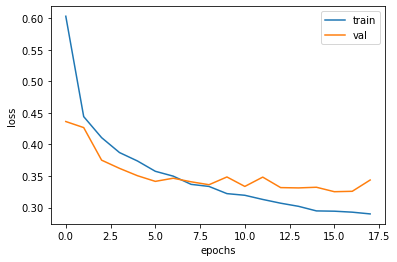

In [56]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

#### 조기 종료로 얻은 모델을 사용하여 검증 세트의 성능 확인

---

### 확인문제

1. 케라스 모델의 fit() 메서드에 검증 세트를 올바르게 전달하는 코드는 무엇인가?  

    ① model.fit(... , val_input=val_input, val_target=val_target)       
    ② model.fit(... , validation_input=val_input, validation_target=val_target)       
    ③ model.fit(... , val_data=(val_input, val_target))  
    ④ model.fit(... , validation_data=(val_input, val_target))       

2. 이전 층의 뉴런 출력 중 70%만 사용하기 위해 드롭아웃 층을 추가하려고 한다. 옳게 설정한 것은?

    ① Dropout(0.7)    
    ② Dropout(0.3)  
    ③ Dropout(1/0.7)  
    ④ Dropout(1/0.3)

3. 케라스 모델의 가중치만 저장하는 메서드는 무엇인가?

    ① save()    
    ② load_model()  
    ③ save_weights()  
    ④ load_weights()      

4. 케라스의 조기 종료 콜백을 사용하려고 한다. 3번의 에포크 동안 손실이 감소되지 않으면 종료하고 최상의 모델 가중치를 복원하도록 설정한 것은 무엇인가?

    ① EarlyStopping(monitor='loss', patience=3)  
    ② EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)  
    ③ EarlyStopping(monitor='accuracy', patience=3)  
    ④ EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)  

### [마무리]

- 드롭아웃(Dropout) 
- 콜백(Callback)
- 조기종료

### [핵심패키지와 함수]

**TensorFlow**

- Dropout : 드롭아웃 층
- save_weights() : 모든 층의 가중치와 절편을 파일에 저장
- load_weights() : save_weights()로 저장된 파일 읽기
- save() : 모델 구조와 모든 가중치와 절편을 파일에 저장
- load_model() : model.save()로 저장된 모델 로드
- ModelCheckpoint : 케라스 모델과 가중치를 일정 간격으로 저장
- EarlyStopping :관심 지표가 더 이상 향상하지 않으면 훈련을 중지

**Numpy**
- agrmax : 배열에서 축을 따라 최대값의 인덱스 반환